# Penguin

## Reference

In [122]:
# https://www.kaggle.com/datasets/youssefaboelwafa/clustering-penguins-species

## Import Library

In [123]:
import pandas as pd
import numpy as np
import re
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from scipy.spatial.distance import pdist, squareform
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

## Import Dataset

In [124]:
path = 'https://raw.githubusercontent.com/notfakearcher/julian/main/02_data/penguins.csv'
penguin = pd.read_csv(path)

## Orgnize and clean data

In [125]:
penguin.isna().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

In [126]:
# clear missing data
penguin = penguin.dropna()
# change object to int type
object_name = penguin.select_dtypes('object').columns
la = LabelEncoder()
penguin[object_name] = penguin[object_name].apply(la.fit_transform)
penguin.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,2
1,39.5,17.4,186.0,3800.0,1
2,40.3,18.0,195.0,3250.0,1
4,36.7,19.3,193.0,3450.0,1
5,39.3,20.6,190.0,3650.0,2


In [127]:
cond = penguin.columns == 'sex'
non_sex_columns = penguin.columns[~cond]
# normalize the data
std = StandardScaler()
penguin1 = penguin.copy()
penguin1.loc[:,non_sex_columns] = std.fit_transform(penguin1.loc[:,non_sex_columns])
penguin1.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,-0.897723,0.777263,-0.126893,-0.572233,2
1,-0.824265,0.117037,-0.107872,-0.509923,1
2,-0.677349,0.421757,-0.073633,-1.195338,1
4,-1.338472,1.081983,-0.081242,-0.946096,1
5,-0.860994,1.742210,-0.092655,-0.696854,2


## PCA

In [128]:
pca = PCA(n_components= 2)
penguin1_reduce = pca.fit_transform(X = penguin1)

## Linkage agglomeration

In [129]:
# apply complete linkage agglomeration 
row_cluster = linkage(penguin1_reduce, method = 'single', metric = 'euclidean')


In [130]:
threshold = row_cluster[:,2].max() / 4

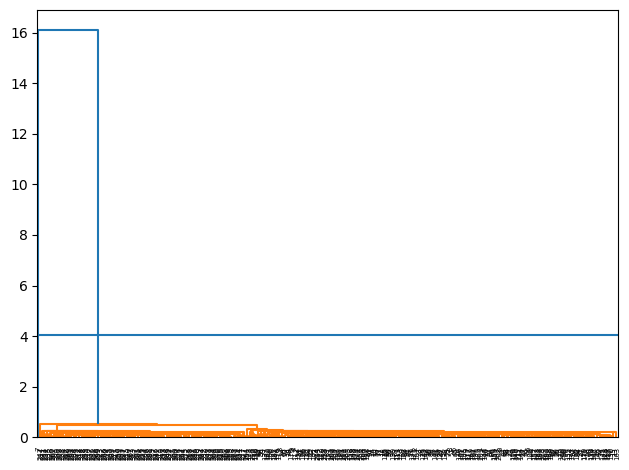

In [131]:
# plot dendrogram cluster
drogram = dendrogram(Z = row_cluster)
plt.axhline(y = threshold)
plt.tight_layout()
plt.show()

In [132]:
help(dendrogram)

Help on function dendrogram in module scipy.cluster.hierarchy:

dendrogram(Z, p=30, truncate_mode=None, color_threshold=None, get_leaves=True, orientation='top', labels=None, count_sort=False, distance_sort=False, show_leaf_counts=True, no_plot=False, no_labels=False, leaf_font_size=None, leaf_rotation=None, leaf_label_func=None, show_contracted=False, link_color_func=None, ax=None, above_threshold_color='C0')
    Plot the hierarchical clustering as a dendrogram.
    
    The dendrogram illustrates how each cluster is
    composed by drawing a U-shaped link between a non-singleton
    cluster and its children. The top of the U-link indicates a
    cluster merge. The two legs of the U-link indicate which clusters
    were merged. The length of the two legs of the U-link represents
    the distance between the child clusters. It is also the
    cophenetic distance between original observations in the two
    children clusters.
    
    Parameters
    ----------
    Z : ndarray
        Th